## HOUSE PRICING PREDICTION

### 1. DATA UNDERSTANDING

### IGNORE WARNINGS

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

### IMPORTING REQUIRED LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

### IMPORTING & READING THE DATASET

In [4]:
# Importing dataset
data = pd.read_csv('train.csv')
 
# making a local copy of imported data
cpy_data = data 

# To display maximum 100 columns & rows
pd.set_option('max_columns',100)
pd.set_option('max_rows',100)

### NUMBER OF ROWS AND COLUMNS IN DATASET

In [5]:
# To find the number of rows and columns
rows, columns = data.shape
print(f'Dataset has {rows} rows and {columns} columns.')

Dataset has 1460 rows and 81 columns.


### NUMBER OF FEATURES

In [6]:
# Looping to find the number of categorical and numerical features
num, obj = 0,0
for feature in data.columns:
    if data.dtypes[feature] != 'O':
        num += 1
    else:
        obj += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'There are {num} numerical features and {obj} categorical features.')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
There are 38 numerical features and 43 categorical features.


### LOOKING FOR DUPLICATES IN THE DATASET

In [7]:
# Looking for data duplicates
row, column = data[data.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


### 2. EDA

### READING ALL COLUMNS

In [8]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### DATA SAMPLE

In [9]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### MISSING DATA

In [10]:
# Looping to find the missing values

mv_gtr30_lst = []  # List to store feature with more than 30% missing value
mv_lsr30_lst = []  # List to store feature with less than 30% missing value

for feature in data:
    if (data[feature].isnull().mean()*100) > 30.0:
        mv_gtr30_lst.append(feature)
    elif 0.000 < (data[feature].isnull().mean()*100) < 30.0:  
        mv_lsr30_lst.append(feature)
        
print(f'There are {len(mv_gtr30_lst)} features that has more than 30% missing value.')
print(f'There are {len(mv_lsr30_lst)} features that has less than 30% missing value.')

There are 5 features that has more than 30% missing value.
There are 14 features that has less than 30% missing value.


In [11]:
def missing_percetage(data):
    print('\nPERCENTAGE MISSING VALUES:')
    cnt=0
    for feature in data:
        if data[feature].isnull().sum()!=0:
            print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
        else:
            cnt+=1
    if cnt == len(data.columns):print('There is no missing values in the dataset')
    print("\n")

In [12]:
missing_percetage(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'Alley' has 93.77% missing values
The feature 'MasVnrType' has 0.55% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'BsmtQual' has 2.53% missing values
The feature 'BsmtCond' has 2.53% missing values
The feature 'BsmtExposure' has 2.6% missing values
The feature 'BsmtFinType1' has 2.53% missing values
The feature 'BsmtFinType2' has 2.6% missing values
The feature 'Electrical' has 0.07% missing values
The feature 'FireplaceQu' has 47.26% missing values
The feature 'GarageType' has 5.55% missing values
The feature 'GarageYrBlt' has 5.55% missing values
The feature 'GarageFinish' has 5.55% missing values
The feature 'GarageQual' has 5.55% missing values
The feature 'GarageCond' has 5.55% missing values
The feature 'PoolQC' has 99.52% missing values
The feature 'Fence' has 80.75% missing values
The feature 'MiscFeature' has 96.3% missing values




### NUMBER OF UNIQUE CATEGORICAL FEATURES

In [13]:
# Looping to find the number of unique categorical features
s_cunique = 0
n_cunique = 0

for feature in data:
    if data[feature].dtype == 'O' : 
        if len(data[feature].unique())==1:
            s_cunique += 1
        else:
            n_cunique += 1

print(f'There are {s_cunique} categorical features that has one unique value.')
print(f'There are {n_cunique} categorical features that has more than one unique value.')

There are 0 categorical features that has one unique value.
There are 43 categorical features that has more than one unique value.


### NUMBER OF UNIQUE NUMERICAL FEATURES

In [14]:
s_nunique = 0
n_nunique = 0
for feature in data:
    if data[feature].dtype != 'O':
        if len(data[feature].unique())==1:
            s_nunique += 1
        else:
            n_nunique += 1

print(f'There are {s_nunique} numerical features that has one unique value including Nan')
print(f'There are {n_nunique} numerical features that has more than one unique value')

There are 0 numerical features that has one unique value including Nan
There are 38 numerical features that has more than one unique value


### DATA DROPING 

In [15]:
# Droping the ID column 
data = data.drop(['Id'],axis='columns')

# Droping the data that has more than 80% of misisng values
data = data[data.columns[data.isnull().mean() < 0.8]]

### DATA MAPPING

In [16]:
data.OverallQual.replace({10:"Very_Excellent", 9:"Excellent", 8:"Very_Good", 
                          7:"Good",6:"Above_Average",5:"Average",4:"Below_Average",
                          3:"Fair",2:"Poor",1:"Very_Poor"},inplace = True)

data.OverallCond.replace({10:"Very_Excellent", 9:"Excellent", 8:"Very_Good", 
                          7:"Good",6:"Above_Average",5:"Average",4:"Below_Average",
                          3:"Fair",2:"Poor",1:"Very_Poor"},inplace = True)

data.MoSold.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',
                     6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',
                     11: 'nov',12: 'dec'},inplace = True)

### DERIVED METRICES

In [17]:
# Creating new metrices
data['YearBuilt_Old'] = data.YearBuilt.max()-data.YearBuilt
data['YearRemodAdd_Old'] = data.YearRemodAdd.max()-data.YearRemodAdd
data['GarageYrBlt_Old'] = data.GarageYrBlt.max()-data.GarageYrBlt
data['YrSold_Old'] = data.YrSold.max()-data.YrSold

# Droping old metrices to neglect redundancy
data = data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

### MISSING VALUE TREATMENT

In [18]:
# Replacing the missing values for categorical features with mode(less than 50%)
for feature in data:
    if data[feature].dtype == 'O'and np.round((data[feature].isnull().mean()*100),2)<=50.0 \
                                 and np.round((data[feature].isnull().mean()*100),2)>0.0:
        data[""+feature+""].fillna(data[""+feature+""].mode()[0],inplace=True)

In [19]:
# statistical summary of attributes that still has misisng values
for feature in [attribute for attribute in data.columns if np.round(data[attribute].isnull().mean()*100)> 0]:
    print(data[feature].describe(),'\n')

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64 

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64 

count    1379.000000
mean       31.493836
std        24.689725
min         0.000000
25%         8.000000
50%        30.000000
75%        49.000000
max       110.000000
Name: GarageYrBlt_Old, dtype: float64 



In [20]:
# Replacing "LotFrontage" with median.
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)

# Replacing "GarageYrBlt_Old" and "MasVnrArea" with 0 since the house might not have one.
data['MasVnrArea'].fillna(0, inplace=True)
data['GarageYrBlt_Old'].fillna(0, inplace=True)

# Data for after missing value treatment:
missing_percetage(data)


PERCENTAGE MISSING VALUES:
There is no missing values in the dataset




### OBSERVATION ON TARGET VARIABLE

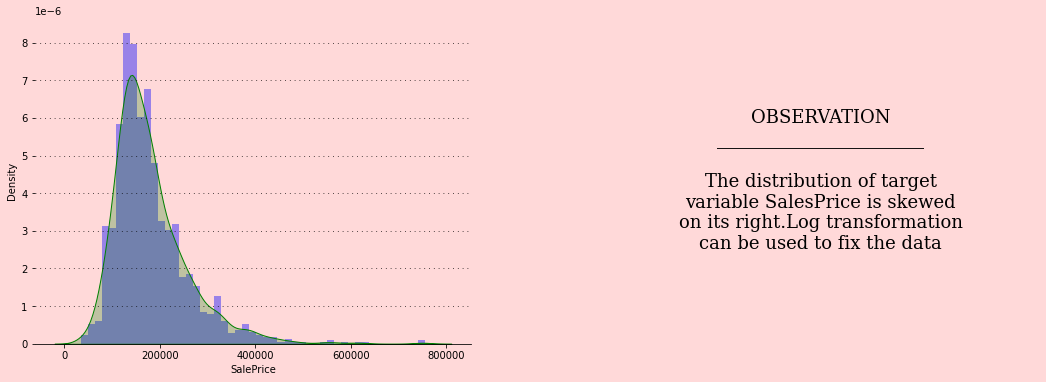

In [21]:
fig = plt.figure(figsize=(18,6))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3, hspace=0.3)
sec_1 = plt.subplot(spec[0,0])
sec_2 = plt.subplot(spec[0,1])

bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)
    
sns.distplot(data['SalePrice'], color='b', ax= sec_1, hist=True, kde_kws={'fill':'True', 'color':'g'})
sec_1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

sec_2.text(0.5,0.5,f'OBSERVATION\n_______________________\n\n\
The distribution of target\nvariable SalesPrice is skewed\non its right.\
Log transformation\ncan be used to fix the data',
ha='center',va='center',size=18, family='serif')

sec_2.xaxis.set_visible(False)
sec_2.yaxis.set_visible(False)
for location in ['top', 'right', 'left', 'bottom']:
    for selection in [sec_1, sec_2]:
        if selection == sec_1 and location == 'bottom':
            continue
        else:
            selection.spines[location].set_visible(False)

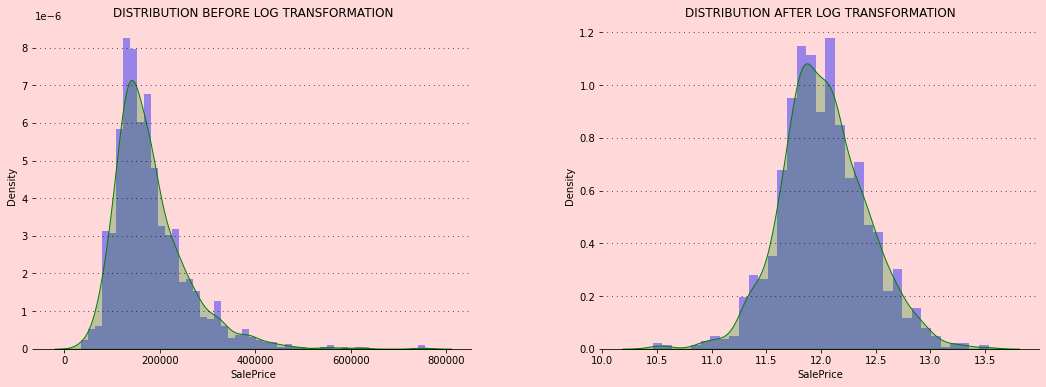

In [22]:
fig = plt.figure(figsize=(18,6))
spec = fig.add_gridspec(1,2)
spec.update(wspace=0.3, hspace=0.3)
sec_1 = plt.subplot(spec[0,0])
sec_2 = plt.subplot(spec[0,1])

bg_color = '#ffd9d9'
for selection in [fig, sec_1, sec_2]:
    selection.set_facecolor(bg_color)
    
sns.distplot(data['SalePrice'], color='b', ax= sec_1, hist=True, kde_kws={'fill':'True', 'color':'g'})
sec_1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sec_1.set_title('DISTRIBUTION BEFORE LOG TRANSFORMATION')

data['SalePrice']=np.log(data["SalePrice"])
sns.distplot(data['SalePrice'], color='b', ax= sec_2, hist=True, kde_kws={'fill':'True', 'color':'g'})
sec_2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sec_2.set_title('DISTRIBUTION AFTER LOG TRANSFORMATION')

for location in ['top', 'right', 'left', 'bottom']:
    for selection in [sec_1, sec_2]:
        if location == 'bottom':
            continue
        else:
            selection.spines[location].set_visible(False)

### OUTLIER PLOT

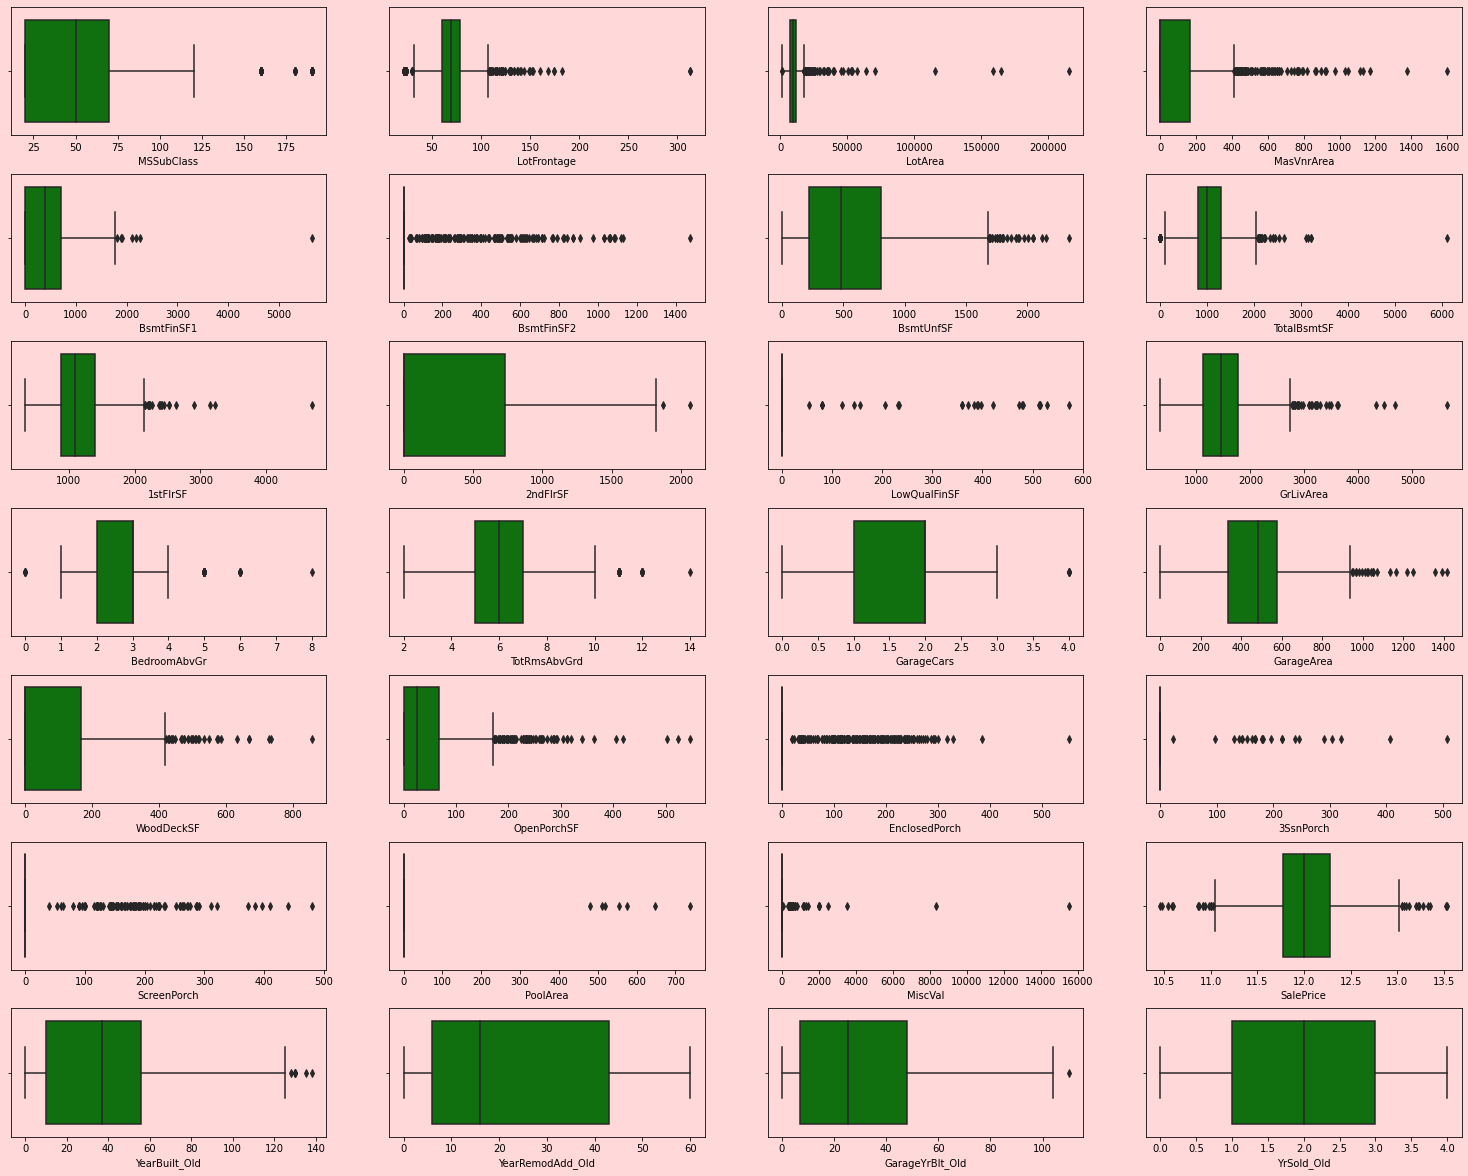

In [23]:
#Creating subplots
import seaborn as sns
fig = plt.figure(figsize=(26,30))
spec = fig.add_gridspec(10,4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])
sec_25 = fig.add_subplot(spec[6,0])
sec_26 = fig.add_subplot(spec[6,1])
sec_27 = fig.add_subplot(spec[6,2])
sec_28 = fig.add_subplot(spec[6,3])


sec = [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10, 
       sec_11, sec_12, sec_13, sec_14, sec_15, sec_16, sec_17, sec_18, sec_19, sec_20,  
       sec_21, sec_22, sec_23, sec_24, sec_25, sec_26, sec_27, sec_28]

# Adding color preference
bg_color = '#ffd9d9'
for selection in sec:
    selection.set_facecolor(bg_color)

cnt = 1
for feature in data:
    if data[feature].nunique() > 4 and (data[feature].dtype !='O' or feature=='SalePrice'):
        sns.boxplot(x=data[feature], ax=sec[cnt], color='green')
        cnt+=1

### OUTLIER TREATMENT

In [24]:
for feature in data:
    if data[feature].nunique() > 2 and (data[feature].dtype !='O' or feature=='SalePrice'):
        lower_quartile = data[feature].quantile(0.25)
        upper_quartile = data[feature].quantile(0.75)
        IQR = upper_quartile - lower_quartile
        lower_fence = lower_quartile - (1.5*IQR)
        upper_fence = upper_quartile + (1.5*IQR)
        
        data[feature] = np.where(data[feature]>upper_fence, 
                                upper_fence,   
                                data[feature])
        
        data[feature] = np.where(data[feature]<lower_fence,
                               lower_fence,
                               data[feature])

### ATTRIBUTE WITH UNIQUE VALUES

In [25]:
s_nunique = 0
n_nunique = 0
for feature in data:
    if data[feature].dtype != 'O':
        if len(data[feature].unique())==1:
            s_nunique += 1
            
        else:
            n_nunique += 1

print(f'There are {s_nunique} numerical features that has one unique value including Nan')
print(f'There are {n_nunique} numerical features that has more than one unique value')

There are 9 numerical features that has one unique value including Nan
There are 25 numerical features that has more than one unique value


In [26]:
# Filtering data by droping attributes with one unique value
data=data[data.columns[data.nunique()!=1]]

### CREATING NUMERICAL AND CATEGORICAL  FEATURE LIST

In [27]:
num, obj = 0, 0
numerical_feature=[]
categorical_feature=[]
for feature in data:
    if data[feature].dtype == 'O':
        categorical_feature.append(feature)
        obj += 1
    else:
        num += 1
        numerical_feature.append(feature)

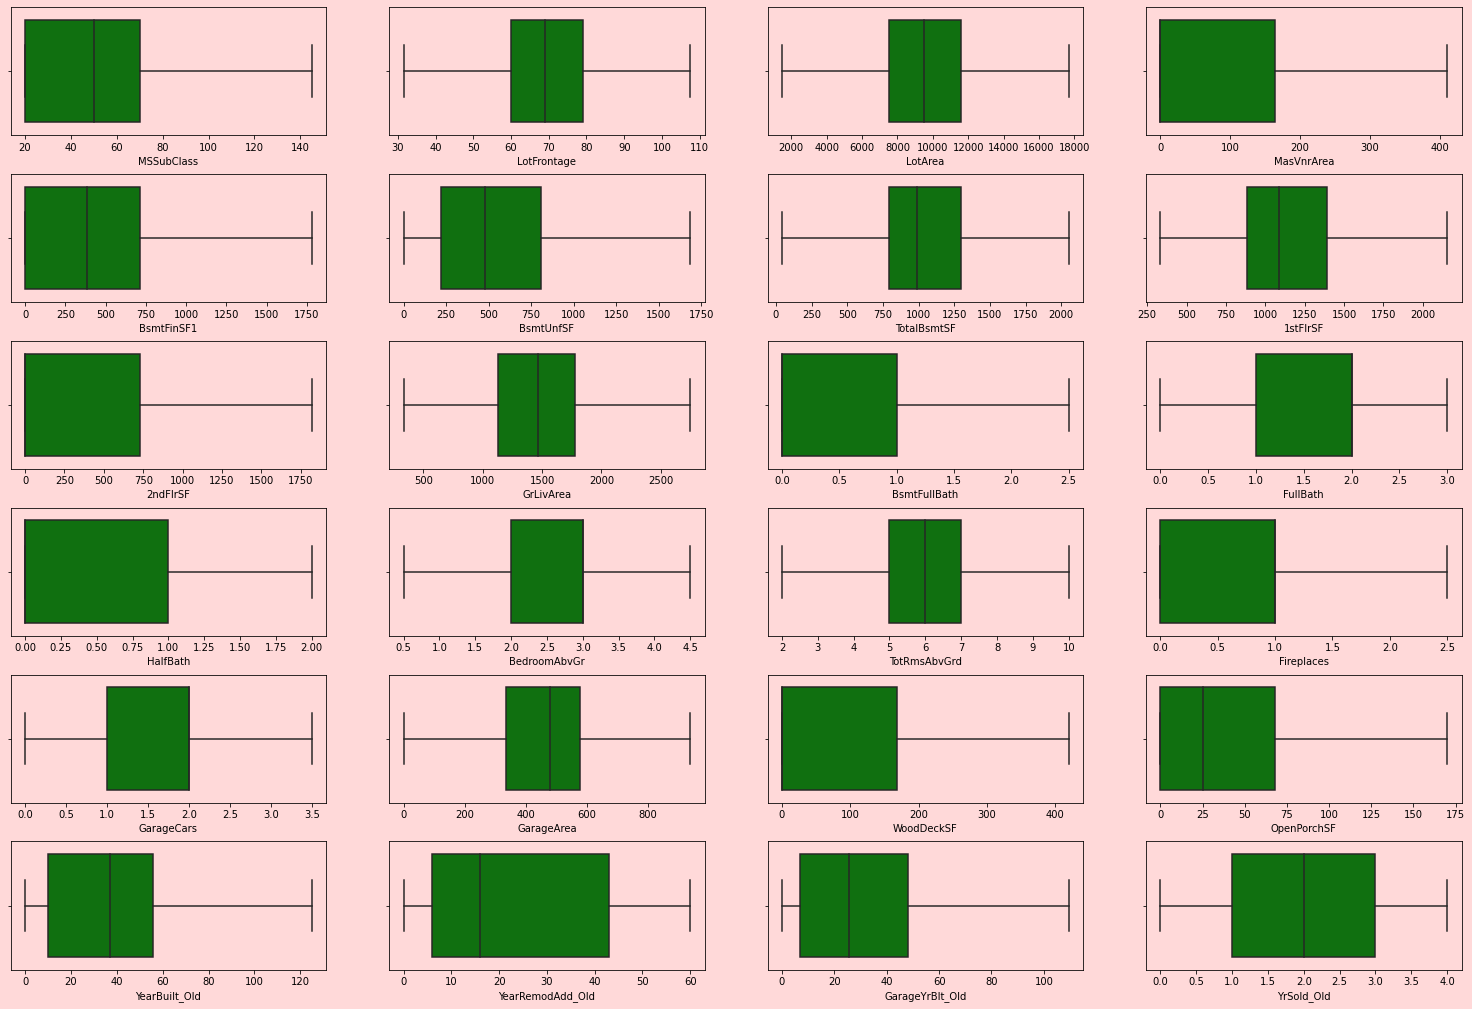

In [28]:
#Creating subplots
fig = plt.figure(figsize=(26,30))
spec = fig.add_gridspec(10,4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])

sec = [fig, sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, 
       sec_09, sec_10, sec_11, sec_12, sec_13, sec_14, sec_15, sec_16,
       sec_17, sec_18, sec_19, sec_20, sec_21, sec_22, sec_23, sec_24]

# Adding color preference
bg_color = '#ffd9d9'
for selection in sec:
    selection.set_facecolor(bg_color)

cnt = 1
for feature in numerical_feature:
    if feature !='SalePrice':
        sns.boxplot(x=data[feature], ax=sec[cnt], color='green')
        cnt+=1

### CORRELATION WITH TARGET VARIABLE

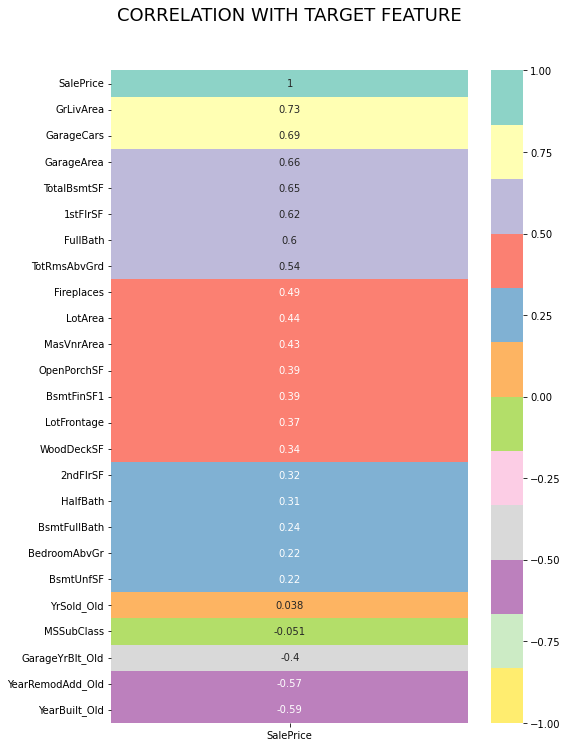

In [29]:
plt.figure(figsize=(8, 12))
hp_var = sns.heatmap(data.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
                     vmin=-1, 
                     vmax=1, 
                     annot=True, 
                     cmap='Set3_r')
hp_var.set_title('CORRELATION WITH TARGET FEATURE', fontdict={'fontsize':18}, pad=50);

### CORRELATION WITHIN THE ATTRIBUTES

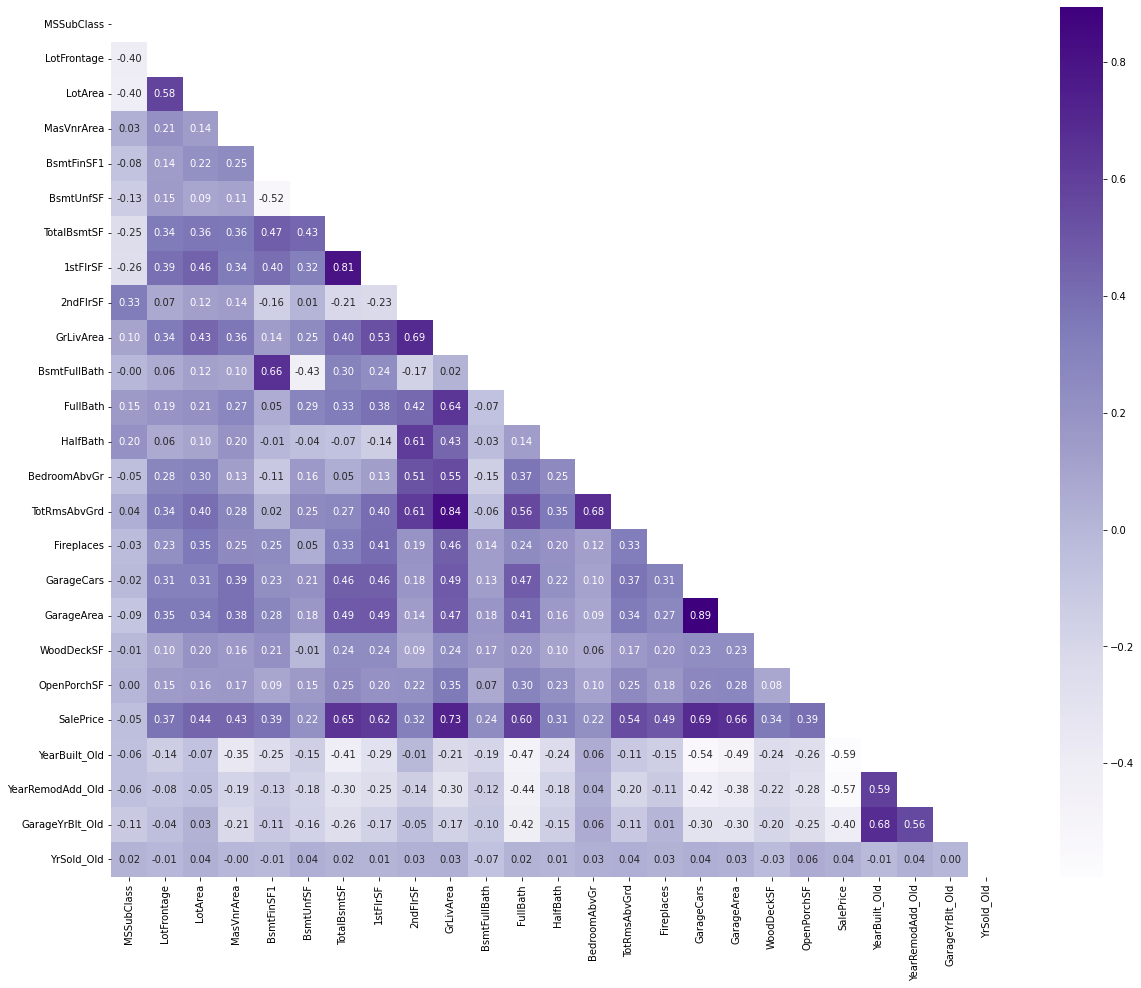

In [30]:
corr = data.corr()
mask = np.triu(corr)
plt.figure(figsize=(20,16))
sns.heatmap(corr, 
            annot=True , 
            fmt='.2f', 
            mask=mask, 
            cmap='Purples')
plt.show()

### 3. MODEL BUILDING

### IMPORTING REQUIRED LIBRARIES

In [31]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

### DATA PREPARATION

In [32]:
# One-hot encoding
data=pd.get_dummies(data,drop_first=True)

# Data spliting (train and test)
data_train, data_test = train_test_split(data, train_size = 0.70, test_size = 0.30, random_state = 42)

# Data dimension check before split
print('DATA DIMENSION BEFORE SPLIT:')
train_rows, train_cols = data_train.shape
print(f'The training dataset has {train_rows} rows and {train_cols} columns')
test_rows, test_cols = data_test.shape
print(f'The testing dataset has {test_rows} rows and {test_cols} columns')

# Feature scaling
scaler = StandardScaler()
data_train[numerical_feature] = scaler.fit_transform(data_train[numerical_feature])
data_train.head()
data_test[numerical_feature] = scaler.fit_transform(data_test[numerical_feature])
data_test.head()

# Dependent and Independent data split
y_train = data_train.pop('SalePrice')
X_train = data_train
y_test = data_test.pop('SalePrice')
X_test = data_test

# Data dimension check after split
print('\nDATA DIMENSION AFTER SPLIT:')
train_rows, train_cols = X_train.shape
print(f'The training dataset has {train_rows} rows and {train_cols} columns')
test_rows, test_cols = X_test.shape
print(f'The testing dataset has {test_rows} rows and {test_cols} columns')

DATA DIMENSION BEFORE SPLIT:
The training dataset has 1021 rows and 253 columns
The testing dataset has 438 rows and 253 columns

DATA DIMENSION AFTER SPLIT:
The training dataset has 1021 rows and 252 columns
The testing dataset has 438 rows and 252 columns


### REGRESSION AND RFE

In [33]:
# Model fit
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# RFE fit
rfe = RFE(lin_reg, n_features_to_select=50)             
rfe = rfe.fit(X_train, y_train)
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

# Metric derivation
# R-Squared of train and test:
r2_train_linReg = r2_score(y_train, y_pred_train)
metric = []
metric.append(r2_train_linReg)
r2_test_linReg = r2_score(y_test, y_pred_test)
metric.append(r2_test_linReg)
metric.append(r2_train_linReg - r2_test_linReg)
print('R-SQUARED VALUES OF THE MODELS:')
print("Train - ",round(r2_train_linReg,4))
print("Test - ",round(r2_test_linReg,4))

# Residual sum of square:
rss1_train = np.sum(np.square(y_train - y_pred_train))
rss1_test = np.sum(np.square(y_test - y_pred_test))
print('\nRSS VALUES OF THE MODELS:')
print('Test - ',round(rss1_test,4))
print('Train - ',round(rss1_train,4))

# Mean sum of square:
metric.append(rss1_train)
metric.append(rss1_test)
metric.append(mean_squared_error(y_train, y_pred_train))
metric.append(mean_squared_error(y_test, y_pred_test))
print('\nMSE VALUES OF THE MODELS :')
print('Train (optimum alpha) - ',round(mean_squared_error(y_train, y_pred_train),4))
print('Test (optimum alpha) -', round(mean_squared_error(y_test, y_pred_test),4))

R-SQUARED VALUES OF THE MODELS:
Train -  0.8725
Test -  0.8118

RSS VALUES OF THE MODELS:
Test -  82.4227
Train -  130.1425

MSE VALUES OF THE MODELS :
Train (optimum alpha) -  0.1275
Test (optimum alpha) - 0.1882


### RIDGE AND LASSO

In [34]:
def RNLModel(folds,estimator_param,X_train,y_train,X_test,y_test):
    
    params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 
                        0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                        9.0, 10.0,10.5,11.5,12.5,15.0, 20, 50, 100, 500, 1000 ]}  
    
    if estimator_param:
        estimator = Ridge()
    else:
        estimator = Lasso()
    
    # Grid Search
    folds=KFold(n_splits=folds,shuffle=True,random_state=42)
    model_cv = GridSearchCV(estimator = estimator, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
    
    model_cv.fit(X_train, y_train) 
    print(model_cv.best_params_)
    print(model_cv.best_score_)
    cv_results = pd.DataFrame(model_cv.cv_results_)
    cv_results = cv_results[cv_results['param_alpha']<=1000]
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
    plt.figure(figsize=(16,5))

    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative Mean Absolute Error')
    plt.title("Negative Mean Absolute Error and alpha")
    plt.legend(['train score', 'test score'], loc='upper right')
    plt.show()
    
    if estimator_param:
        model = Ridge(alpha=model_cv.best_params_["alpha"])
      
    else:
        model = Lasso(alpha=model_cv.best_params_["alpha"])
        
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Metric derivation
    # R-Squared of train and test:
    r2_train_linReg = r2_score(y_train, y_pred_train)
    metric = []
    metric.append(r2_train_linReg)
    r2_test_linReg = r2_score(y_test, y_pred_test)
    metric.append(r2_test_linReg)
    metric.append(r2_train_linReg - r2_test_linReg)
    print('R-SQUARED VALUES OF THE MODELS:')
    print("Train - ",round(r2_train_linReg,4))
    print("Test - ",round(r2_test_linReg,4))

    # Residual sum of square:
    rss1_train = np.sum(np.square(y_train - y_pred_train))
    rss1_test = np.sum(np.square(y_test - y_pred_test))
    print('\nRSS VALUES OF THE MODELS:')
    print('Test - ',round(rss1_test,4))
    print('Train - ',round(rss1_train,4))

    # Mean sum of square:
    metric.append(rss1_train)
    metric.append(rss1_test)
    metric.append(mean_squared_error(y_train, y_pred_train))
    metric.append(mean_squared_error(y_test, y_pred_test))
    print('\nMSE VALUES OF THE MODELS :')
    print('Train (optimum alpha) - ',round(mean_squared_error(y_train, y_pred_train),4))
    print('Test (optimum alpha) -', round(mean_squared_error(y_test, y_pred_test),4))
    return model,metric

In [35]:
def plot_model(model):
    # Plot definition
    fig = plt.figure(figsize=(18,6))
    spec = fig.add_gridspec(1,2)
    spec.update(wspace=0.3, hspace=0.3)
    sec_1 = plt.subplot(spec[0,0])
    sec_2 = plt.subplot(spec[0,1])

    # Setting color preference
    bg_color = '#ffd9d9'
    for selection in [fig, sec_1, sec_2]:
        selection.set_facecolor(bg_color)

    # Model prediction
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Regression Plot
    sns.regplot(y_pred_test,y_test-y_pred_test, color="black", marker='o', ax=sec_1)
    sec_1.set_title('HOMOSCEDASITY', fontsize=22)              
    sec_1.set_xlabel('Target Predicted', fontsize=16)                      
    sec_1.set_ylabel('Error', fontsize=16)

    # Distribution plot for error terms
    sns.distplot((y_train - y_pred_train), color='black', bins = 30, ax=sec_2)
    sec_2.set_title('NORMALITY CHECK',fontsize = 20)
    sec_2.set_xlabel('Errors', fontsize = 18) 
    sec_2.set_ylabel('Density', fontsize=16)

    plt.show()

### ASSUMPTION VERIFICATION

### RIDGE MODEL

Fitting 15 folds for each of 32 candidates, totalling 480 fits
{'alpha': 6.0}
-0.20999299490989407


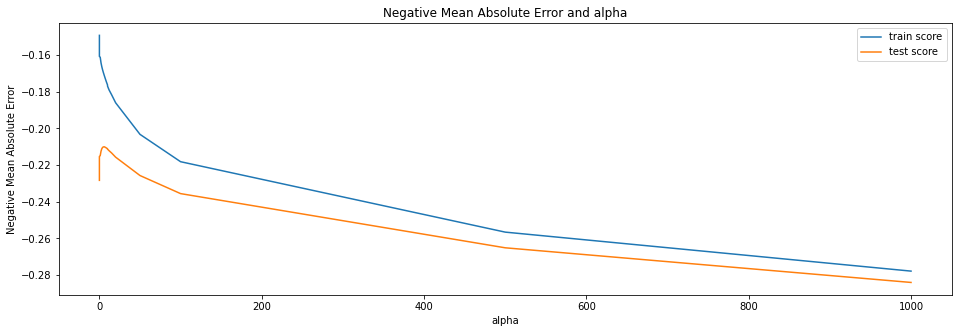

R-SQUARED VALUES OF THE MODELS:
Train -  0.9378
Test -  0.9147

RSS VALUES OF THE MODELS:
Test -  37.3735
Train -  63.4694

MSE VALUES OF THE MODELS :
Train (optimum alpha) -  0.0622
Test (optimum alpha) - 0.0853


In [36]:
final_ridge,metric_ridge = RNLModel(15,True,X_train,y_train,X_test,y_test)

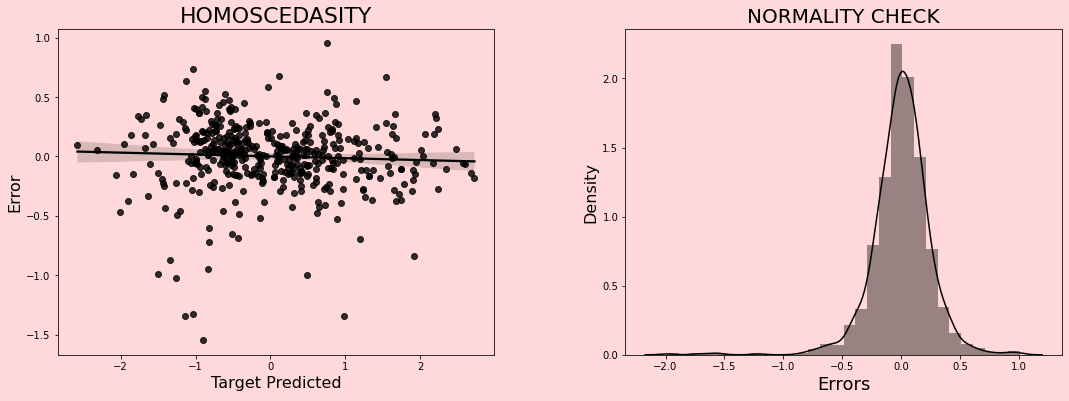

In [37]:
plot_model(final_ridge)

### LASSO MODEL

Fitting 15 folds for each of 32 candidates, totalling 480 fits
{'alpha': 0.001}
-0.20933559192299905


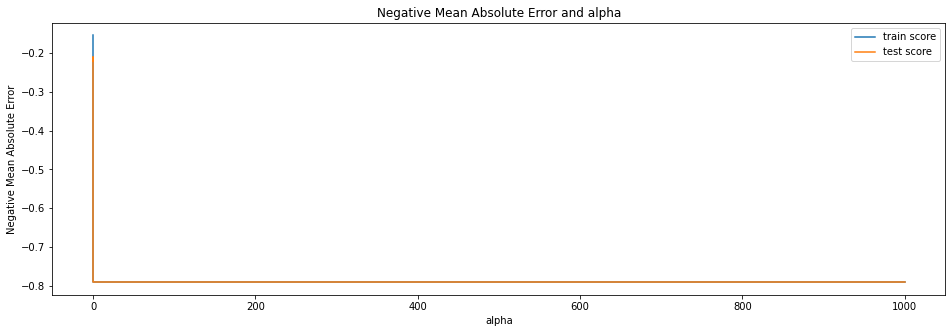

R-SQUARED VALUES OF THE MODELS:
Train -  0.9329
Test -  0.9154

RSS VALUES OF THE MODELS:
Test -  37.0514
Train -  68.5116

MSE VALUES OF THE MODELS :
Train (optimum alpha) -  0.0671
Test (optimum alpha) - 0.0846


In [38]:
final_lasso,metric_lasso = RNLModel(15,False,X_train,y_train,X_test,y_test)

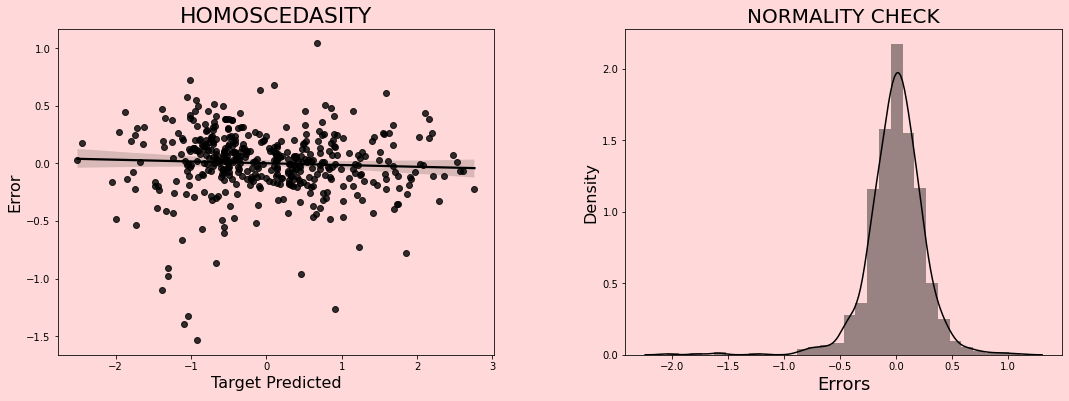

In [39]:
plot_model(final_lasso)

### 3. MODEL COMPARISION

### COMPARISION TABLE

In [47]:
reg_table = {'METRICS': ['R2 Score (Train)',
                        'R2 Score (Test)',
                        'Diffrence in R2 test and train',
                        'RSS (Train)','RSS (Test)',
                        'MSE (Train)','MSE (Test)'], 
            'REGRESSION WITH RFE': metric}

reg_metric = pd.DataFrame(reg_table ,columns = ['METRICS', 'REGRESSION WITH RFE'] )

rid_metric = pd.Series(metric_ridge, name = 'RIDGE REGRESSION')
las_metric = pd.Series(metric_lasso, name = 'LASSO REGRESSION')

comparision_table = pd.concat([reg_metric, rid_metric, las_metric], axis = 1)

comparision_table

,METRICS,REGRESSION WITH RFE,RIDGE REGRESSION,LASSO REGRESSION
0,R2 Score (Train),0.872534,0.937836,0.932898
1,R2 Score (Test),0.811820,0.914672,0.915408
2,Diffrence in R2 test and train,0.060714,0.023164,0.017490
3,RSS (Train),130.142518,63.469385,68.511628
4,RSS (Test),82.422679,37.373532,37.051381
5,MSE (Train),0.127466,0.062164,0.067102
6,MSE (Test),0.188180,0.085328,0.084592


### TOP 10 ATTRIBUTES BY BETA

In [50]:
beta = pd.DataFrame(index = X_train.columns)
beta['RIDGE'] = final_ridge.coef_
beta['LASSO'] = final_lasso.coef_
beta.sort_values(by = ['LASSO'], ascending=False).head(10)

,RIDGE,LASSO
GrLivArea,0.311578,0.359462
OverallQual_Excellent,0.265547,0.337026
Functional_Typ,0.259900,0.299776
Neighborhood_Crawfor,0.249058,0.286821
OverallCond_Excellent,0.217233,0.250973
Neighborhood_StoneBr,0.226721,0.249626
Exterior1st_BrkFace,0.193454,0.236479
OverallQual_Very_Good,0.221007,0.234417
SaleCondition_Alloca,0.191053,0.193266
RoofMatl_WdShngl,0.177882,0.183077


### 4. CONCLUSION

**FROM THE COMPARISION TABLE**
* Its very obvious from the table there is no greater differneces in the model.
* But, considering decimal changes **Lasso model has better MSE, RSS.**
* Lasso model has comparitively least difference in R-Squared value.

**ALPHA SCORE COMPARISION**

* ***RIDGE ALPHA - 6***
* ***LASSO ALPHA - 0.001***